In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Zad 1
plant1_dt = pd.read_csv("Plant_1_Generation_Data.csv",parse_dates=['DATE_TIME'])
plant2_dt = pd.read_csv("Plant_2_Generation_Data.csv",parse_dates=['DATE_TIME'])

whole_dataset = pd.concat([plant1_dt, plant2_dt], ignore_index=True)

In [4]:
# Zad 2
filtered_dataset = whole_dataset.dropna()

In [5]:
filtered_dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
136472,2020-06-17 23:45:00,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
136473,2020-06-17 23:45:00,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
136474,2020-06-17 23:45:00,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0


Text(0, 0.5, 'AC POWER')

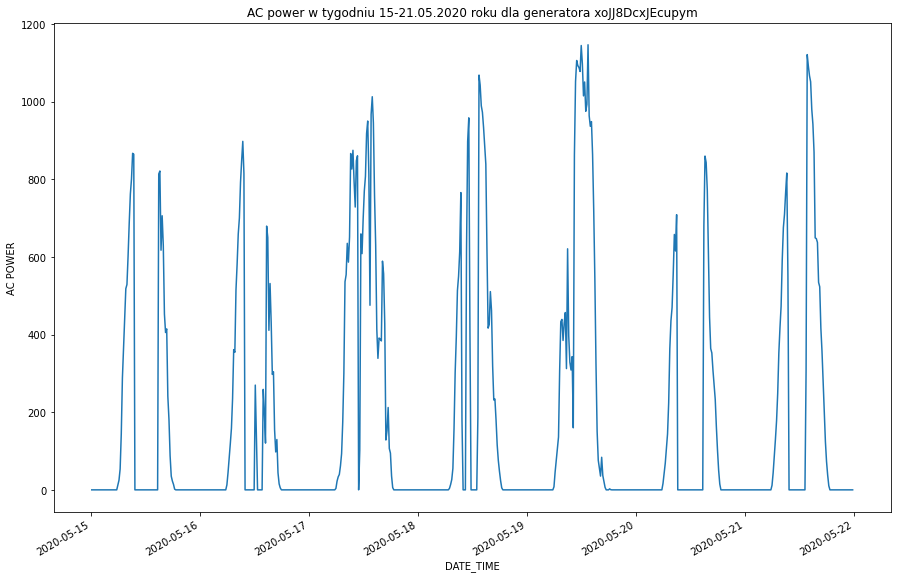

In [6]:
# Zad 3
one_generator_df = filtered_dataset[(filtered_dataset["SOURCE_KEY"] == "xoJJ8DcxJEcupym") 
                                    & (filtered_dataset["DATE_TIME"] > "15-05-2020 00:00")
                                    & (filtered_dataset["DATE_TIME"] <= "21-05-2020 23:59")]
one_generator_df =one_generator_df.set_index("DATE_TIME")
plot = one_generator_df["AC_POWER"].plot( kind="line",
                     title="AC power w tygodniu 15-21.05.2020 roku dla generatora xoJJ8DcxJEcupym", figsize=(15,10))
plot.set_ylabel("AC POWER")

Text(0, 0.5, 'AC POWER')

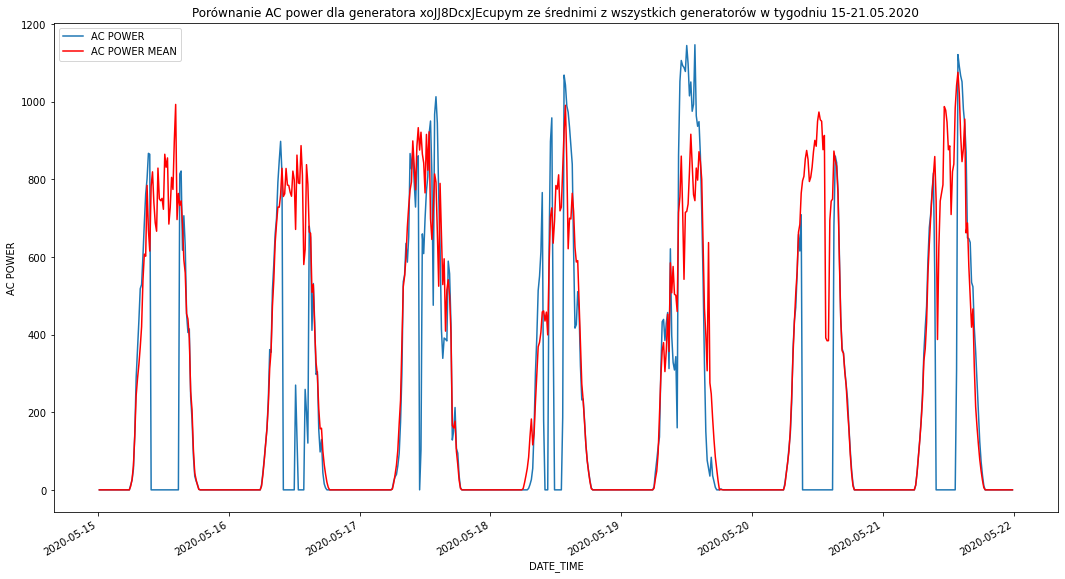

In [8]:
# Zad 4

one_week = filtered_dataset[(filtered_dataset["DATE_TIME"] > "15-05-2020 00:00")
                                    & (filtered_dataset["DATE_TIME"] <= "2020-05-21 23:59")]
grouped_generators_week = one_week.groupby(["DATE_TIME"])["AC_POWER"].mean().to_frame()

plot = one_generator_df["AC_POWER"].plot(figsize=(18,10))
plot = grouped_generators_week["AC_POWER"].plot(color="red", title="Porównanie AC power dla generatora xoJJ8DcxJEcupym ze średnimi z wszystkich generatorów w tygodniu 15-21.05.2020")
plot.legend(["AC POWER","AC POWER MEAN"])
plot.set_ylabel("AC POWER")

In [9]:
# Zad 5
grouped_generators_all_df = filtered_dataset.groupby(["DATE_TIME"])["AC_POWER"].transform('mean').to_frame()
grouped_generators_all_df.rename(columns = {'AC_POWER':'AC_POWER_MEAN'}, inplace = True)

filtered_dataset2 =filtered_dataset.join(grouped_generators_all_df)
less_than_average = filtered_dataset2[(filtered_dataset2["AC_POWER"] < 0.8 * filtered_dataset2["AC_POWER_MEAN"])]
# tabela z wszystkimi generatorami, których AC POWER wynosił mniej niż 80% średniej z wszystkich generatorów w danym momencie czasowym
less_than_average

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC_POWER_MEAN
510,2020-05-15 06:00:00,4135001.0,1BY6WEcLGh8j5v7,37.142857,3.585714,0.000000,6.259559e+06,9.566570
511,2020-05-15 06:00:00,4135001.0,1IF53ai7Xc0U56Y,53.500000,5.162500,0.000000,6.183645e+06,9.566570
512,2020-05-15 06:00:00,4135001.0,3PZuoBAID5Wc2HD,58.000000,5.585714,0.000000,6.987759e+06,9.566570
513,2020-05-15 06:00:00,4135001.0,7JYdWkrLSPkdwr4,58.428571,5.628571,0.000000,7.602960e+06,9.566570
514,2020-05-15 06:00:00,4135001.0,McdE0feGgRqW7Ca,54.375000,5.250000,0.000000,7.158964e+06,9.566570
...,...,...,...,...,...,...,...,...
135879,2020-06-17 17:00:00,4136001.0,vOuJvMaM2sgwLmb,53.300000,51.633333,4196.000000,2.427565e+06,90.182998
135880,2020-06-17 17:00:00,4136001.0,xMbIugepa2P7lBB,57.033333,55.266667,4092.200000,1.068963e+08,90.182998
135881,2020-06-17 17:00:00,4136001.0,xoJJ8DcxJEcupym,51.193333,49.573333,4191.000000,2.093356e+08,90.182998
135893,2020-06-17 17:15:00,4136001.0,Quc1TzYxW2pYoWX,105.866667,102.900000,3616.933333,3.296458e+08,141.883125


In [10]:
# posortowane generatory według tego ile razy AC_POWER pojedynczego generatora
# było na poziomie < 80% średniej z wszystkich generatorów w danym momencie czasowym
less_than_average.groupby("SOURCE_KEY").size().sort_values( ascending=False)

SOURCE_KEY
Quc1TzYxW2pYoWX    682
Et9kgGMDl729KT4    517
LYwnQax7tkwH5Cb    495
rrq4fwE8jgrTyWY    468
WcxssY2VbP4hApt    425
q49J1IKaHRwDQnt    409
81aHJ1q11NBPMrL    401
xoJJ8DcxJEcupym    345
LlT2YUhhzqhg5Sw    341
PeE6FRyGXUgsRhN    332
9kRcWv60rDACzjR    330
oZZkBaNadn6DNKz    310
bvBOhCH3iADSZry    294
V94E5Ben1TlhnDV    294
vOuJvMaM2sgwLmb    279
1BY6WEcLGh8j5v7    278
oZ35aAeoifZaQzV    256
Qf4GUc1pJu5T6c6    251
4UPUqMRk7TRMgml    244
Mx2yZCDsyf6DPfv    218
ih0vzX44oOqAx2f    200
z9Y9gH1T5YWrNuG    199
rGa61gmuvPhdLxV    192
zVJPv84UY57bAof    192
pkci93gMrogZuBj    190
wCURE6d3bPkepu2    190
sjndEbLyjtCKgGv    190
WRmjgnKYAwPKWDb    188
zBIq5rxdHJRwDNY    187
ZoEaEvLYb1n2sOq    185
iCRJl6heRkivqQ3    184
YxYtjZvoooNbGkE    184
7JYdWkrLSPkdwr4    183
uHbuxQJl8lW7ozc    180
ZnxXDlPa8U1GXgE    179
3PZuoBAID5Wc2HD    174
McdE0feGgRqW7Ca    174
VHMLBKoKgIrUVDU    167
1IF53ai7Xc0U56Y    165
adLQvlD726eNBSB    155
NgDl19wMapZy17u    149
mqwcsP2rE7J0TFp    134
IQ2d7wF4YD8zU1Q    123


In [21]:
plant2_dt

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4136001.0,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,15-05-2020 00:00,4136001.0,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,15-05-2020 00:00,4136001.0,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,15-05-2020 00:00,4136001.0,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,15-05-2020 00:00,4136001.0,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,17-06-2020 23:45,4136001.0,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,17-06-2020 23:45,4136001.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,17-06-2020 23:45,4136001.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,17-06-2020 23:45,4136001.0,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08
